# Welcome to my python data analysis project

## In this project we will explore data exploration and visualisation techniques, clustering, classifier models and neural networks on a white wine dataset. The aim of this project is to determine wine quality through the wine's chemical properties.

# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

In [5]:
def load_wine_data(wine_path='winequality-white.csv'):
    return pd.read_csv(wine_path, delimiter=";")

# Data exploration and Visualisation

# Overview of attributes in the dataset

In [6]:
wine = load_wine_data()

wine.head() # Display the top five rows of the DataFrame

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

# Overview of the data

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# Correlation Matrix

In [8]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

# Histograms

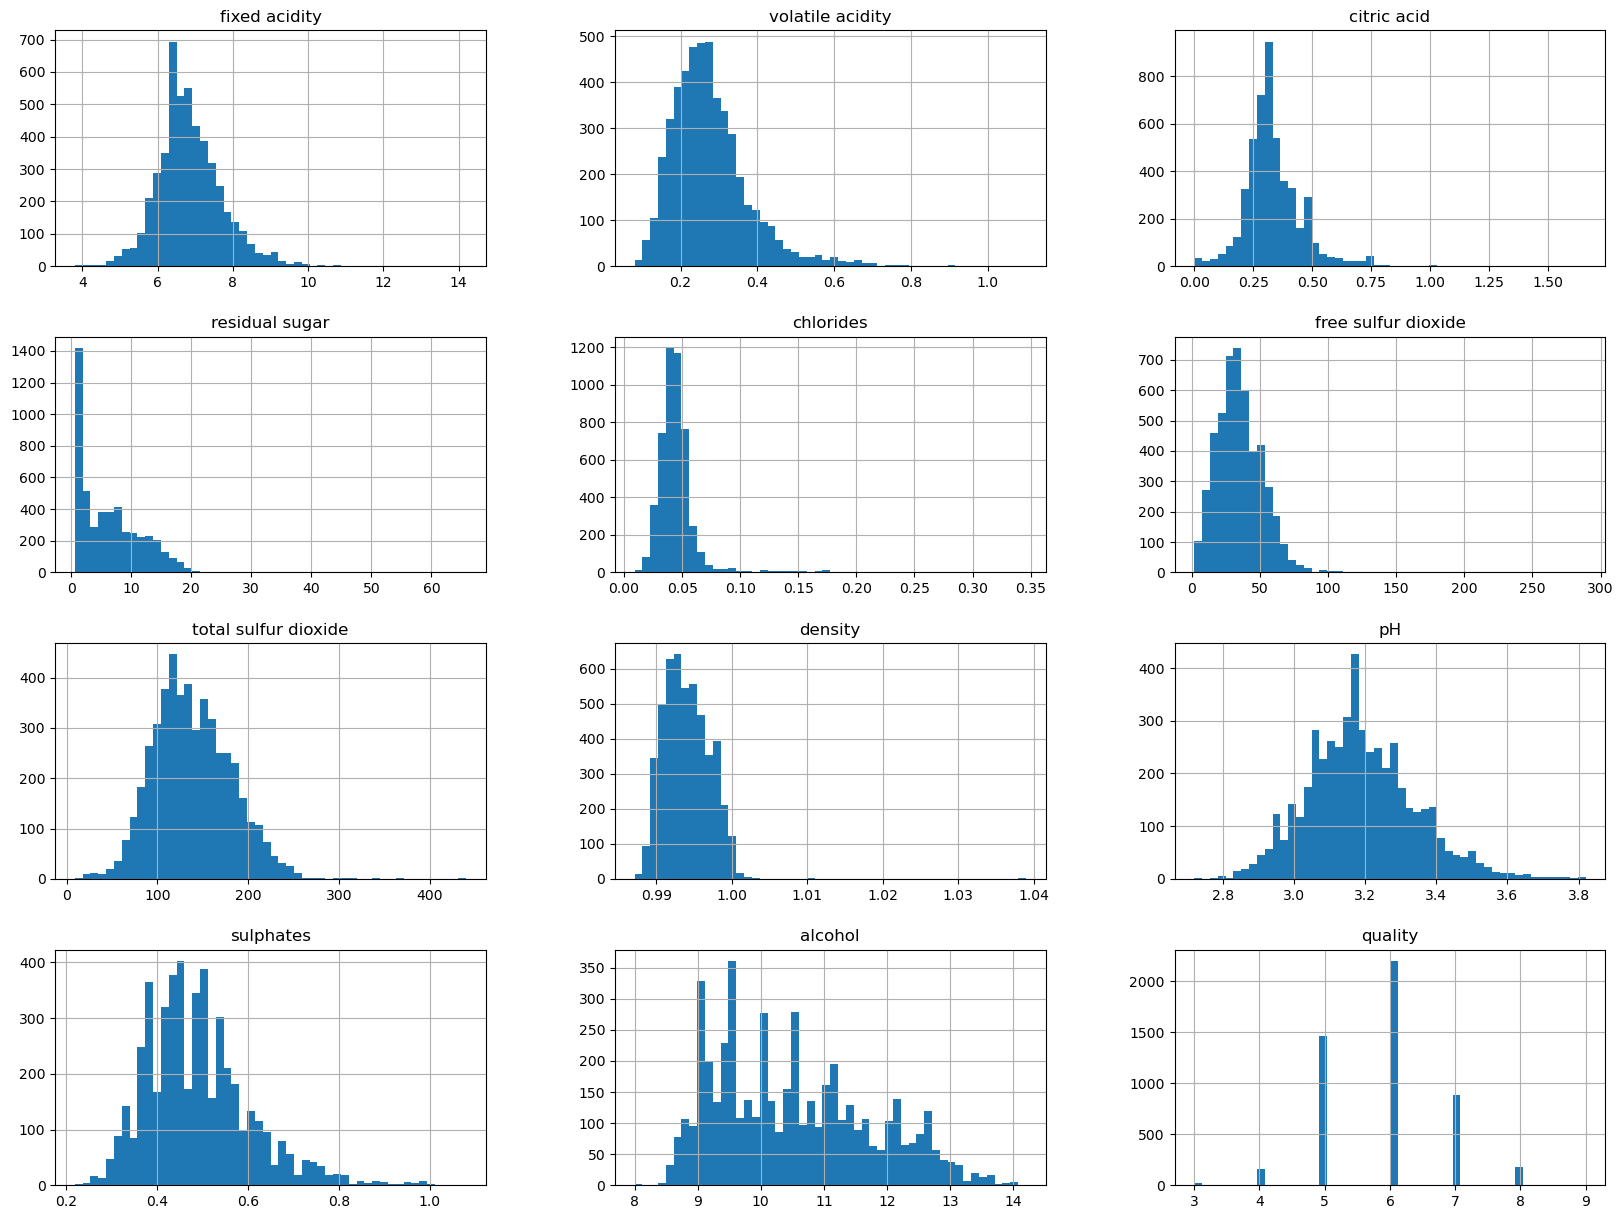

In [9]:
# Wine histogram
wine.hist(bins=50, figsize=(20,15))
plt.show()

# Scatter Plot

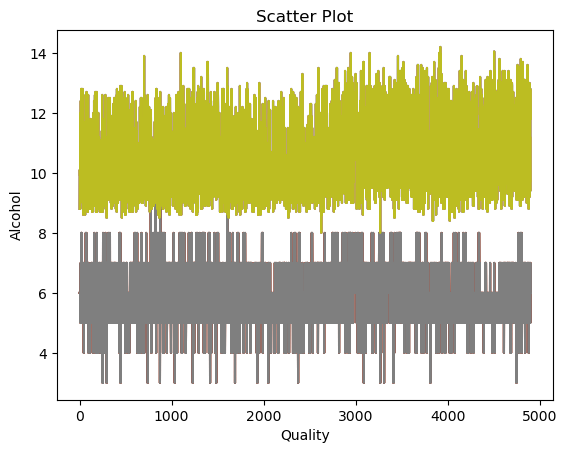

In [14]:
import matplotlib.pyplot as plt
plt.plot(wine['quality'])
plt.plot(wine['alcohol'])

# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Quality')
plt.ylabel('Alcohol')
 
plt.show()

# Correlation Heatmap, Scatter Plot Matrix and Box Plot

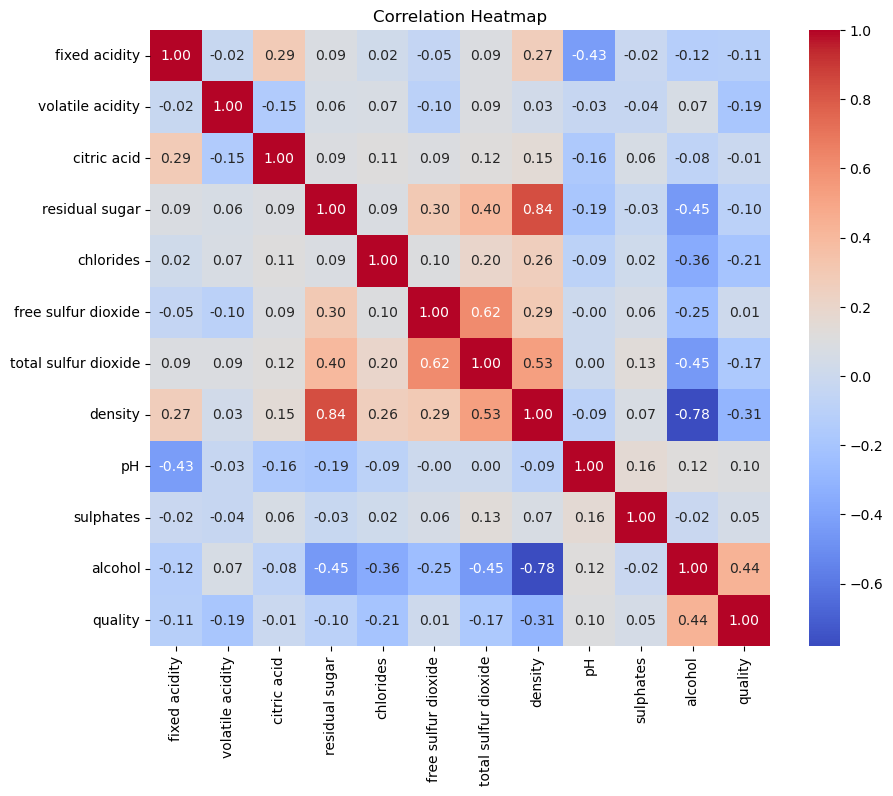

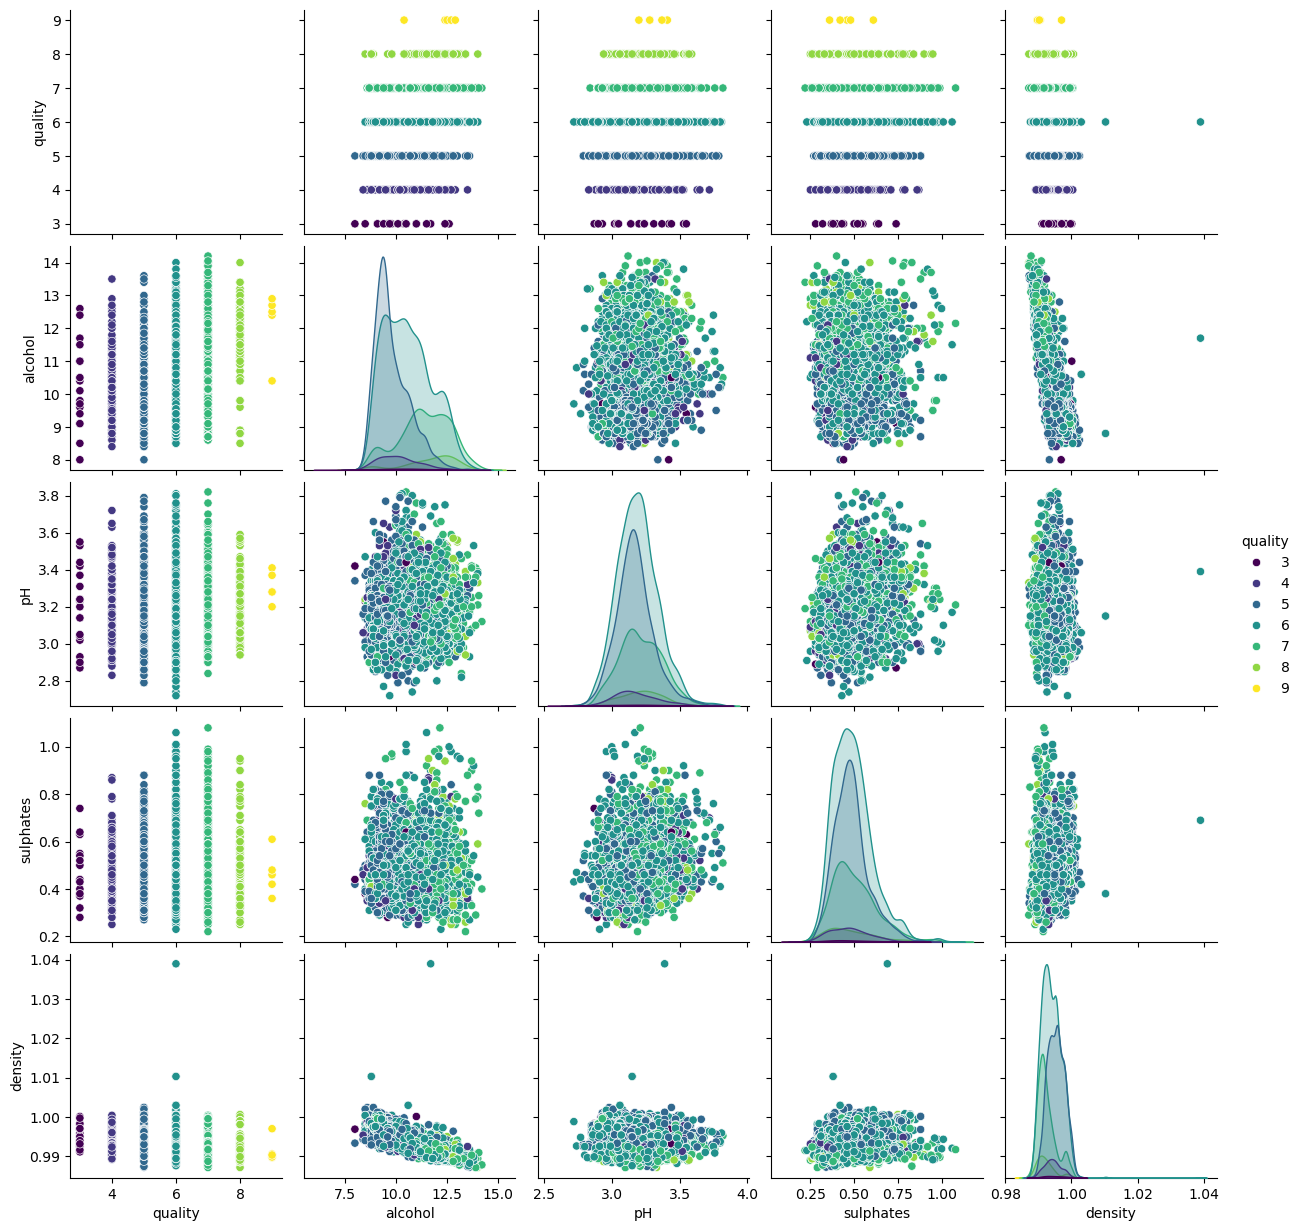

C:\Users\patry\AppData\Local\Temp\ipykernel_10904\2896958314.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wine, x='quality', y='alcohol', palette='pastel')


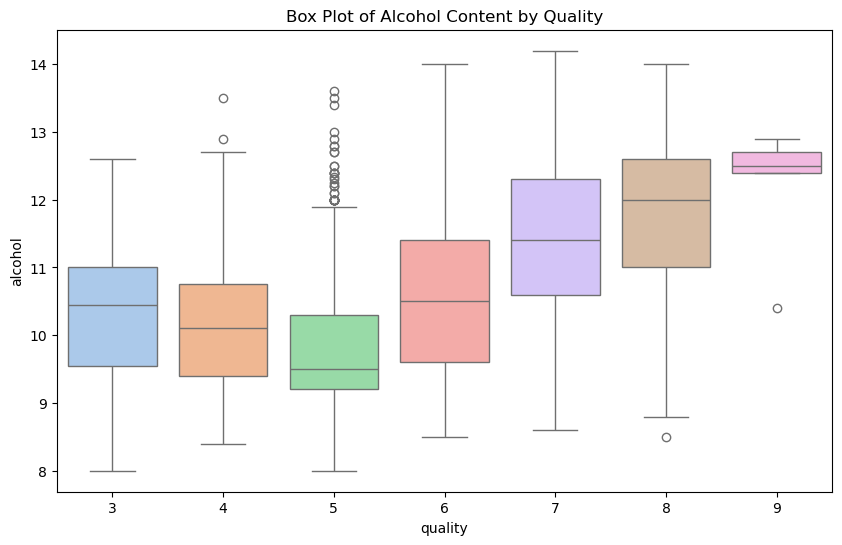

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = wine.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(wine, vars=['quality', 'alcohol', 'pH', 'sulphates', 'density'], hue='quality', palette='viridis')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=wine, x='quality', y='alcohol', palette='pastel')
plt.title("Box Plot of Alcohol Content by Quality")
plt.show()

# Histogram and KDE (Kernel Density Estimate)

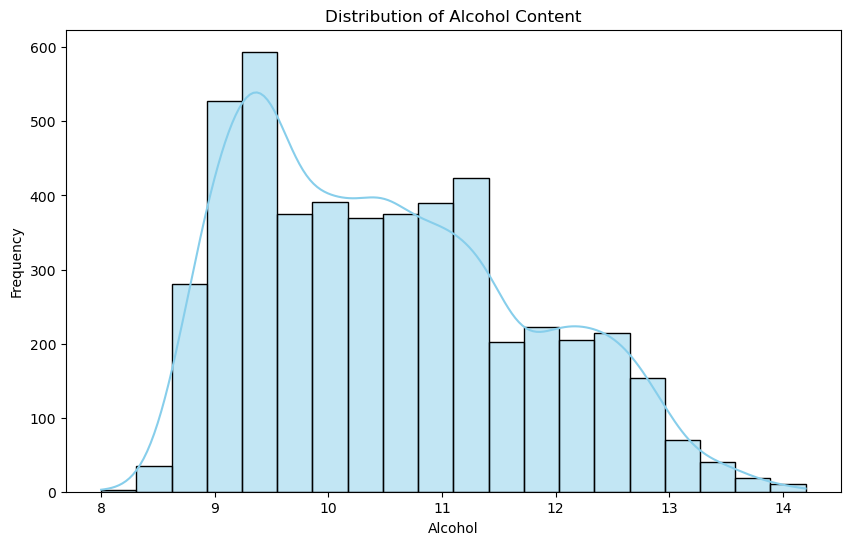

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(wine['alcohol'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Alcohol Content")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

# Violin Plot

C:\Users\patry\AppData\Local\Temp\ipykernel_10904\4238471085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=wine, x='quality', y='alcohol', palette='muted')


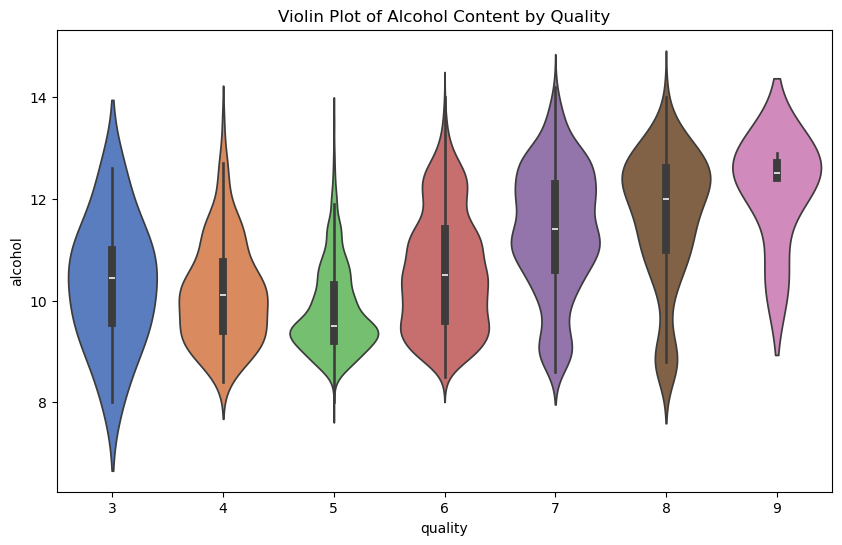

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=wine, x='quality', y='alcohol', palette='muted')
plt.title("Violin Plot of Alcohol Content by Quality")
plt.show()

# 3D Scatter Plot

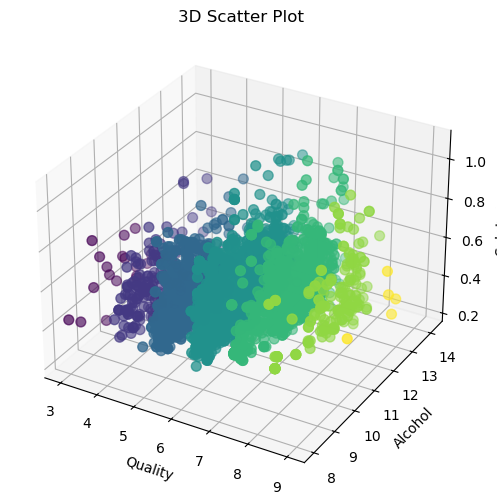

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(wine['quality'], wine['alcohol'], wine['sulphates'], c=wine['quality'], cmap='viridis', s=50)
ax.set_title("3D Scatter Plot")
ax.set_xlabel("Quality")
ax.set_ylabel("Alcohol")
ax.set_zlabel("Sulphates")
plt.show()

# Clustering

# Setup

In [12]:
# Importing important modules (Copy pasted from the tutorial, determine if we need all these imports)
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required


# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


# Used for clustering
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore", message="^UserWarning")

def load_wine_data(wine_path='winequality-white.csv'):
    # The delimiter is not a comma in this csv, but rather a semicolon, so we need to specify this
    return pd.read_csv(wine_path, delimiter=";")


wine = load_wine_data()

## Decision Boundary Functions

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### Organise into datasets
Here we are going to take the wine dataset, and create 3 new datasets that will be used, in addition to the original one. Each new dataset has less attributes than the last. The attributes have been removed in order of their correleation with quality (low -> high). 

We also removed the quality attribute first, as we are using unsupervised learning.

In [14]:
wine_without_quality = wine.drop('quality', axis=1)

wine8 = wine_without_quality.copy()
wine8 = wine8.drop("free sulfur dioxide", axis=1)
wine8 = wine8.drop("citric acid", axis=1)
wine8 = wine8.drop("sulphates", axis =1)

wine5 = wine8.copy()
wine5 = wine5.drop("residual sugar", axis=1)
wine5 = wine5.drop("pH", axis=1)
wine5 = wine5.drop("fixed acidity", axis=1)

wine3 = wine5.copy()
wine3 = wine3.drop("total sulfur dioxide", axis=1)
wine3 = wine3.drop("volatile acidity", axis=1)

### Normalisation
To normalise my data, I used min max normalisation (gave better score than Z-score normalisation).

I normalised each dataset separately.

In [15]:
def normalise_dataset(dataset):
    #scaler = StandardScaler()
    scaler = MinMaxScaler()
    
    # Splits the dataset into a training and a test set (80/20 split)
    dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=42)

    # We apply the standard scaler to our dataset
    dataset_train_scaled = scaler.fit_transform(dataset_train) 

    # After fitting and transform the scaler to our test set, we only transform the test set using it
    dataset_test_scaled = scaler.transform(dataset_test)

    return dataset_train_scaled, dataset_test_scaled


cluster11_train, cluster11_test = normalise_dataset(wine_without_quality)

cluster8_train, cluster8_test = normalise_dataset(wine8)

cluster5_train, cluster5_test = normalise_dataset(wine5)

cluster3_train, cluster3_test = normalise_dataset(wine3)

**We first used PCA to condense the dataset into 2 columns**

In [16]:
pca = PCA(n_components=2)

pca_11 = pca.fit_transform(cluster11_train)
pca_8 = pca.fit_transform(cluster8_train)
pca_5 = pca.fit_transform(cluster5_train)
pca_3 = pca.fit_transform(cluster3_train)

### K Means

In [17]:
kmeans11_k3 = KMeans(n_clusters=3, n_init=10, random_state=1)
kmeans11_k3.fit_predict(pca_11)

kmeans8_k3 = KMeans(n_clusters=3, n_init=10, random_state=1)
kmeans8_k3.fit_predict(pca_8)

kmeans5_k3 = KMeans(n_clusters=3, n_init=10, random_state=1)
kmeans5_k3.fit_predict(pca_5)

kmeans3_k3 = KMeans(n_clusters=3, n_init=10, random_state=1)
kmeans3_k3.fit_predict(pca_3)



kmeans11_k5 = KMeans(n_clusters=5, n_init=10, random_state=1)
kmeans11_k5.fit_predict(pca_11)

kmeans8_k5 = KMeans(n_clusters=5, n_init=10, random_state=1)
kmeans8_k5.fit_predict(pca_8)

kmeans5_k5 = KMeans(n_clusters=5, n_init=10, random_state=1)
kmeans5_k5.fit_predict(pca_5)

kmeans3_k5 = KMeans(n_clusters=5, n_init=10, random_state=1)
kmeans3_k5.fit_predict(pca_3)

array([1, 3, 2, ..., 2, 0, 0])

### Plotting Decision Boundaries

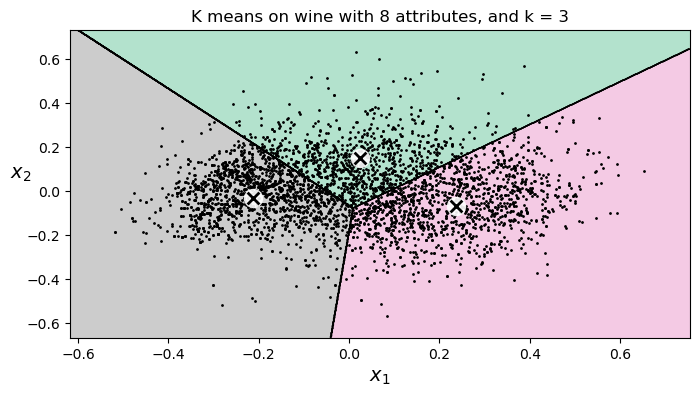

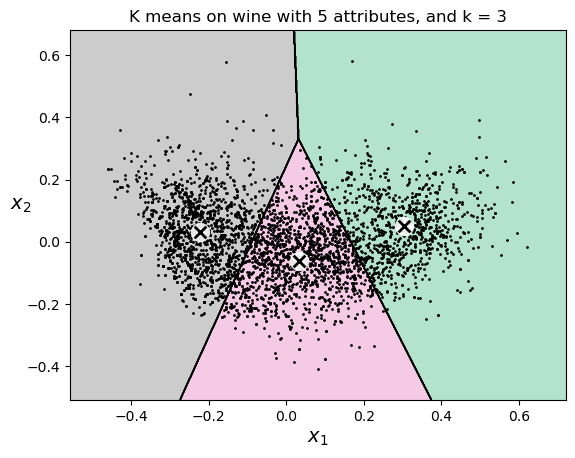

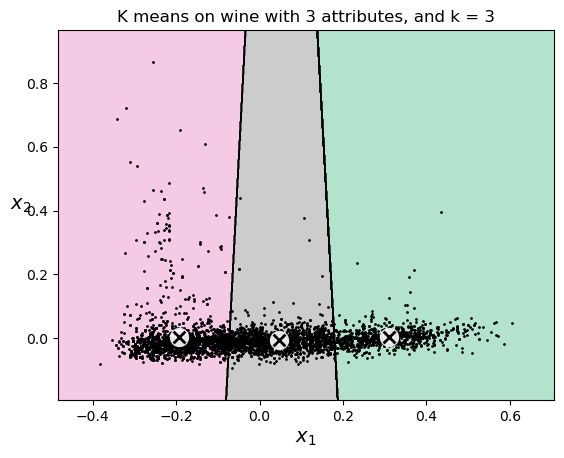

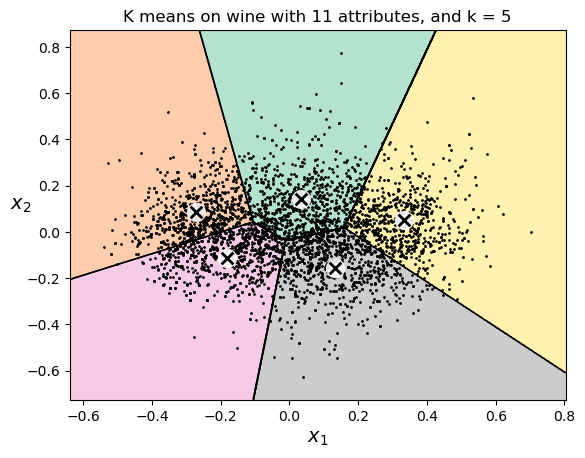

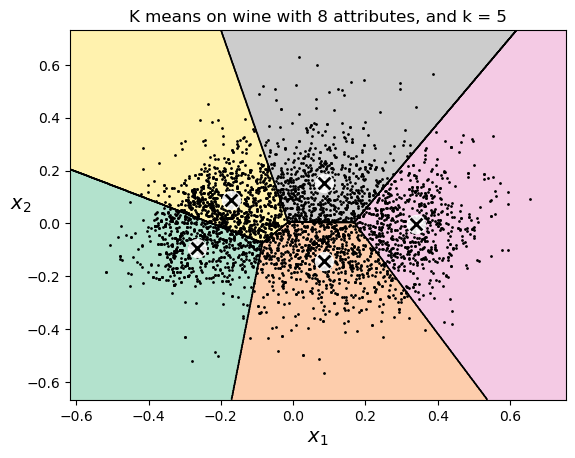

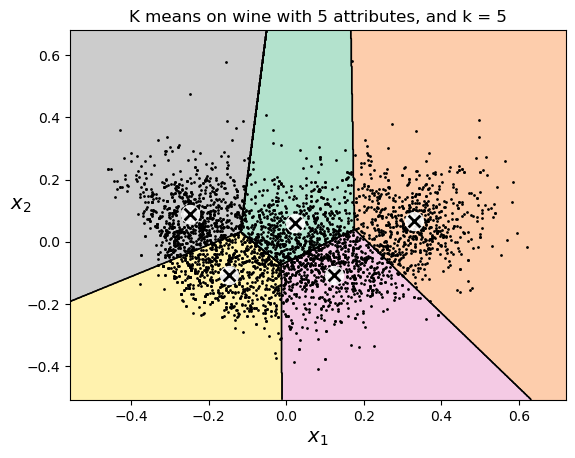

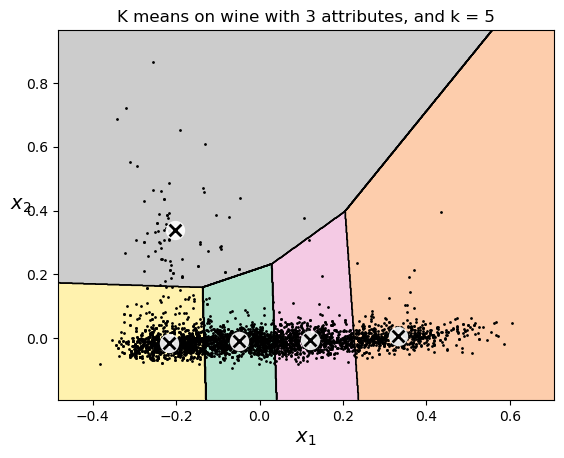

In [26]:
plt.figure(figsize=(8, 4))


plt.title("K means on wine with 8 attributes, and k = 3")
plot_decision_boundaries(kmeans8_k3, pca_8)
plt.show()

plt.title("K means on wine with 5 attributes, and k = 3")
plot_decision_boundaries(kmeans5_k3, pca_5)
plt.show()

plt.title("K means on wine with 3 attributes, and k = 3")
plot_decision_boundaries(kmeans3_k3, pca_3)
plt.show()


# k = 5
plt.title("K means on wine with 11 attributes, and k = 5")
plot_decision_boundaries(kmeans11_k5, pca_11)
plt.show()

plt.title("K means on wine with 8 attributes, and k = 5")
plot_decision_boundaries(kmeans8_k5, pca_8)
plt.show()

plt.title("K means on wine with 5 attributes, and k = 5")
plot_decision_boundaries(kmeans5_k5, pca_5)
plt.show()

plt.title("K means on wine with 3 attributes, and k = 5")
plot_decision_boundaries(kmeans3_k5, pca_3)
plt.show()

## Hierarchical Clustering

Due to the poor results, I experimented with hierarchical clustering too, but this yielded the same results

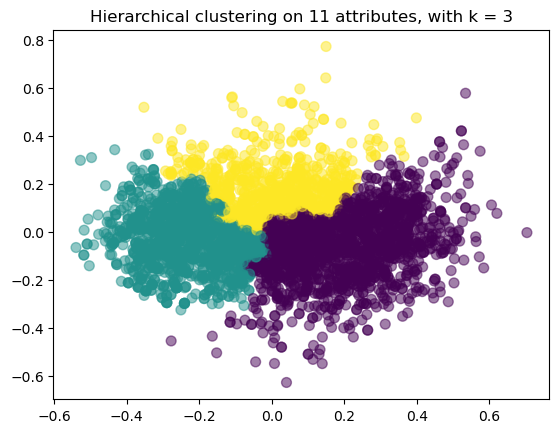

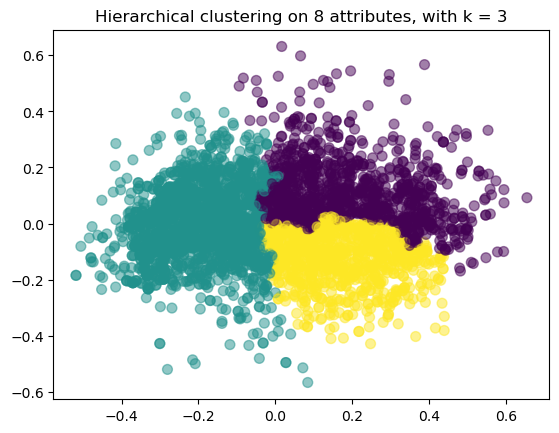

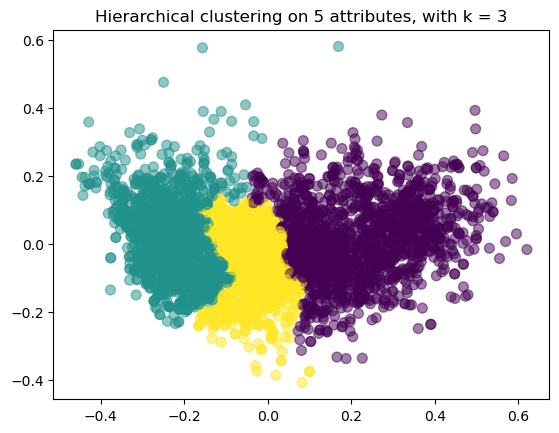

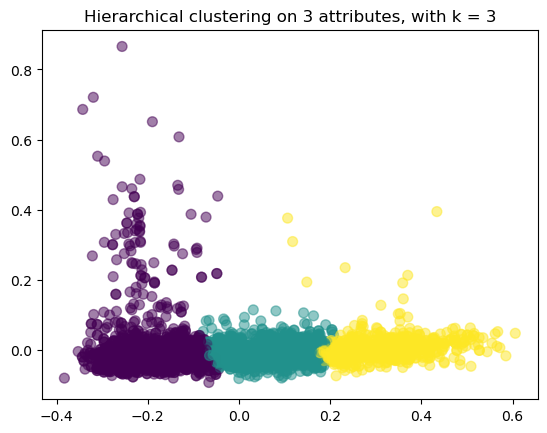

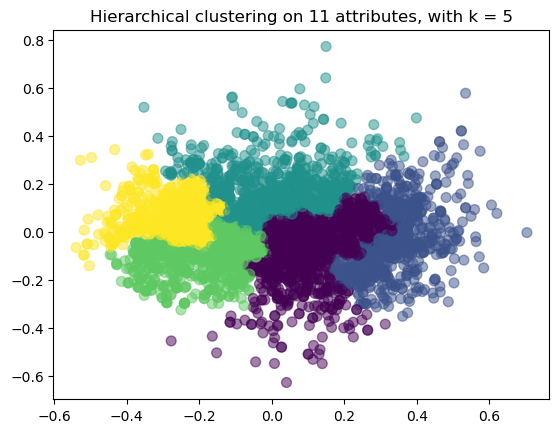

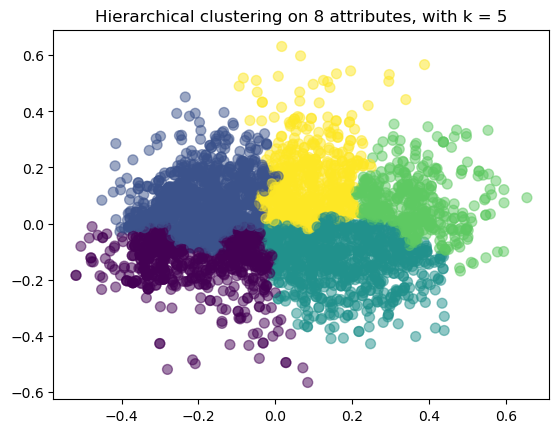

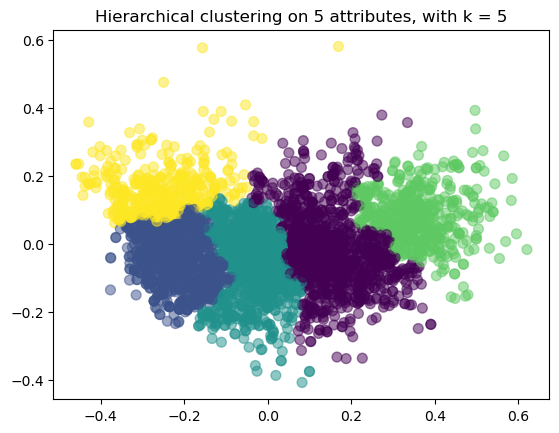

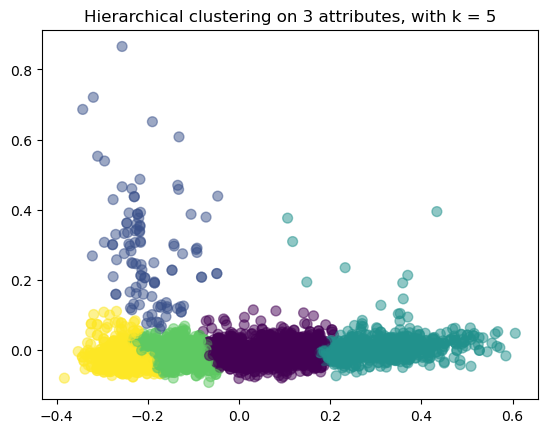

In [27]:
from sklearn.cluster import AgglomerativeClustering

# k = 3
hierarch_k3 = AgglomerativeClustering(n_clusters=3)

applyHierarch11_k3 = hierarch_k3.fit_predict(pca_11)
plt.scatter(pca_11[:, 0], pca_11[:, 1], c=applyHierarch11_k3, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 11 attributes, with k = 3")
plt.show()


applyHierarch8_k3 = hierarch_k3.fit_predict(pca_8)
plt.scatter(pca_8[:, 0], pca_8[:, 1], c=applyHierarch8_k3, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 8 attributes, with k = 3")
plt.show()


applyHierarch5_k3 = hierarch_k3.fit_predict(pca_5)
plt.scatter(pca_5[:, 0], pca_5[:, 1], c=applyHierarch5_k3, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 5 attributes, with k = 3")
plt.show()


applyHierarch3_k3 = hierarch_k3.fit_predict(pca_3)
plt.scatter(pca_3[:, 0], pca_3[:, 1], c=applyHierarch3_k3, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 3 attributes, with k = 3")
plt.show()



# k = 5
hierarch_k5 = AgglomerativeClustering(n_clusters=5)

applyHierarch11_k5 = hierarch_k5.fit_predict(pca_11)
plt.scatter(pca_11[:, 0], pca_11[:, 1], c=applyHierarch11_k5, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 11 attributes, with k = 5")
plt.show()

applyHierarch8_k5 = hierarch_k5.fit_predict(pca_8)
plt.scatter(pca_8[:, 0], pca_8[:, 1], c=applyHierarch8_k5, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 8 attributes, with k = 5")
plt.show()


applyHierarch5_k5 = hierarch_k5.fit_predict(pca_5)
plt.scatter(pca_5[:, 0], pca_5[:, 1], c=applyHierarch5_k5, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 5 attributes, with k = 5")
plt.show()


applyHierarch3_k5 = hierarch_k5.fit_predict(pca_3)
plt.scatter(pca_3[:, 0], pca_3[:, 1], c=applyHierarch3_k5, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 3 attributes, with k = 5")
plt.show()

### Silhouette Scores

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


print("k = 3")
print("Silhouette score for K means, on 11 attributes and k = 3: " + str(silhouette_score(pca_11, kmeans11_k3.labels_)))
print("Silhouette score for hierarchical clustering, on 11 attributes and k = 3: " + str(silhouette_score(pca_11, applyHierarch11_k3)))

print("Silhouette score for K means, on 8 attributes and k = 3: " + str(silhouette_score(pca_8, kmeans8_k3.labels_)))
print("Silhouette score for hierarchical clustering, on 8 attributes and k = 3: " + str(silhouette_score(pca_8, applyHierarch8_k3)))

print("Silhouette score for K means, on 5 attributes and k = 3: " + str(silhouette_score(pca_5, kmeans5_k3.labels_)))
print("Silhouette score for hierarchical clustering, on 5 attributes and k = 3: " + str(silhouette_score(pca_5, applyHierarch5_k3)))

print("Silhouette score for K means, on 3 attributes and k = 3: " + str(silhouette_score(pca_3, kmeans3_k3.labels_)))
print("Silhouette score for hierarchical clustering, on 3 attributes and k = 3: " + str(silhouette_score(pca_3, applyHierarch3_k3)))

print("")

print("Davies Bouldin score for K means, on 11 attributes and k = 3: " + str(davies_bouldin_score(pca_11, kmeans11_k3.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 11 attributes and k = 3: " + str(davies_bouldin_score(pca_11, applyHierarch11_k3)))

print("Davies Bouldin score for K means, on 8 attributes and k = 3: " + str(davies_bouldin_score(pca_8, kmeans8_k3.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 8 attributes and k = 3: " + str(davies_bouldin_score(pca_8, applyHierarch8_k3)))

print("Davies Bouldin score for K means, on 5 attributes and k = 3: " + str(davies_bouldin_score(pca_5, kmeans5_k3.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 5 attributes and k = 3: " + str(davies_bouldin_score(pca_5, applyHierarch5_k3)))

print("Davies Bouldin score for K means, on 3 attributes and k = 3: " + str(davies_bouldin_score(pca_3, kmeans3_k3.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 3 attributes and k = 3: " + str(davies_bouldin_score(pca_3, applyHierarch3_k3)))


print("\n\nk = 5")
print("Silhouette score for K means, on 11 attributes and k = 5: " + str(silhouette_score(pca_11, kmeans11_k5.labels_)))
print("Silhouette score for hierarchical clustering, on 11 attributes and k = 5: " + str(silhouette_score(pca_11, applyHierarch11_k5)))

print("Silhouette score for K means, on 8 attributes and k = 5: " + str(silhouette_score(pca_8, kmeans8_k5.labels_)))
print("Silhouette score for hierarchical clustering, on 8 attributes and k = 5: " + str(silhouette_score(pca_8, applyHierarch8_k5)))

print("Silhouette score for K means, on 5 attributes and k = 5: " + str(silhouette_score(pca_5, kmeans5_k5.labels_)))
print("Silhouette score for hierarchical clustering, on 5 attributes and k = 5: " + str(silhouette_score(pca_5, applyHierarch5_k5)))

print("Silhouette score for K means, on 3 attributes and k = 5: " + str(silhouette_score(pca_3, kmeans3_k5.labels_)))
print("Silhouette score for hierarchical clustering, on 3 attributes and k = 5: " + str(silhouette_score(pca_3, applyHierarch3_k5)))

print("")

print("Davies Bouldin score for K means, on 11 attributes and k = 5: " + str(davies_bouldin_score(pca_11, kmeans11_k5.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 11 attributes and k = 5: " + str(davies_bouldin_score(pca_11, applyHierarch11_k5)))

print("Davies Bouldin score for K means, on 8 attributes and k = 5: " + str(davies_bouldin_score(pca_8, kmeans8_k5.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 8 attributes and k = 5: " + str(davies_bouldin_score(pca_8, applyHierarch8_k5)))

print("Davies Bouldin score for K means, on 5 attributes and k = 5: " + str(davies_bouldin_score(pca_5, kmeans5_k5.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 5 attributes and k = 5: " + str(davies_bouldin_score(pca_5, applyHierarch5_k5)))

print("Davies Bouldin score for K means, on 3 attributes and k = 5: " + str(davies_bouldin_score(pca_3, kmeans3_k5.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 3 attributes and k = 5: " + str(davies_bouldin_score(pca_3, applyHierarch3_k5)))

k = 3
Silhouette score for K means, on 11 attributes and k = 3: 0.36212738011735374
Silhouette score for hierarchical clustering, on 11 attributes and k = 3: 0.3467145359802881
Silhouette score for K means, on 8 attributes and k = 3: 0.36502077828087826
Silhouette score for hierarchical clustering, on 8 attributes and k = 3: 0.3600730491925631
Silhouette score for K means, on 5 attributes and k = 3: 0.39706612235913136
Silhouette score for hierarchical clustering, on 5 attributes and k = 3: 0.30494294814946005
Silhouette score for K means, on 3 attributes and k = 3: 0.5265626379405528
Silhouette score for hierarchical clustering, on 3 attributes and k = 3: 0.523518432375483

Davies Bouldin score for K means, on 11 attributes and k = 3: 1.0167123380655256
Davies Bouldin score for hierarchical clustering, on 11 attributes and k = 3: 0.9844380923762325
Davies Bouldin score for K means, on 8 attributes and k = 3: 0.9714684879143829
Davies Bouldin score for hierarchical clustering, on 8 att

### Elbow method to determine the optimal number of clusters

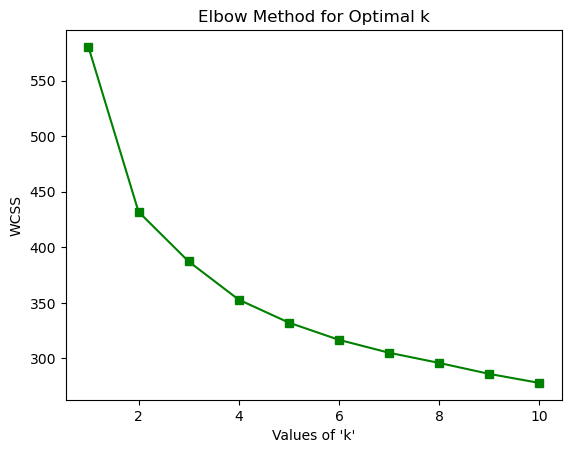

In [29]:
wcss = {}

# Loop over a range of cluster counts (e.g., 1 to 10) to calculate WCSS
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(cluster11_train)
    wcss[i] = kmeans.inertia_


# Plot WCSS values to visualize the "elbow" point
plt.plot(list(wcss.keys()), list(wcss.values()), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')  # WCSS is the sum of the variance between observations within each cluster
plt.title('Elbow Method for Optimal k')
plt.show()

From the above graph, I identified that 4 was the optimal value of k.

### Clustering with optimal number of clusters

In [30]:
kmeans11_k4 = KMeans(n_clusters=4, n_init=10, random_state=1)
kmeans11_k4.fit_predict(pca_11)

kmeans8_k4 = KMeans(n_clusters=4, n_init=10, random_state=1)
kmeans8_k4.fit_predict(pca_8)

kmeans5_k4 = KMeans(n_clusters=4, n_init=10, random_state=1)
kmeans5_k4.fit_predict(pca_5)

kmeans3_k4 = KMeans(n_clusters=4, n_init=10, random_state=1)
kmeans3_k4.fit_predict(pca_3)

array([2, 0, 1, ..., 1, 1, 1])

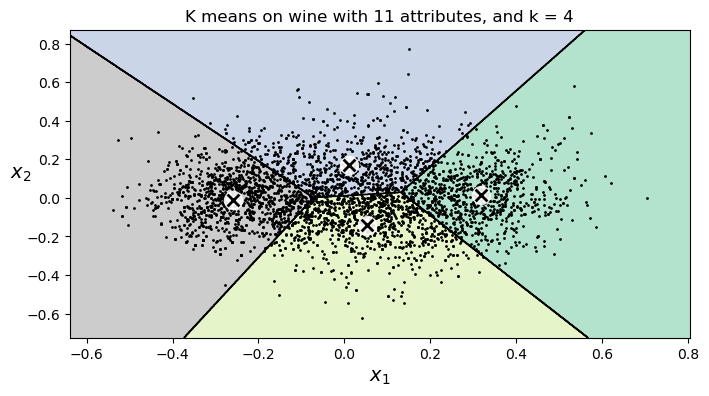

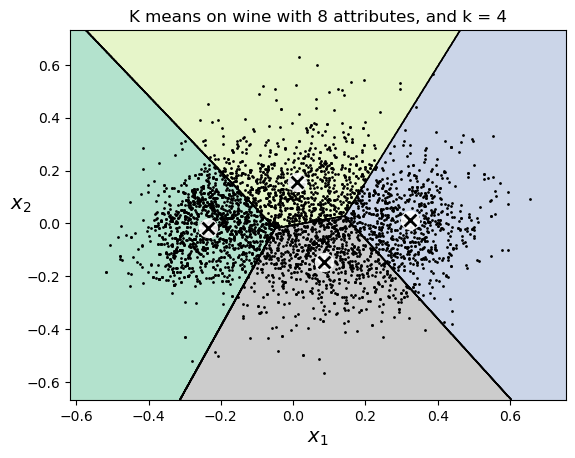

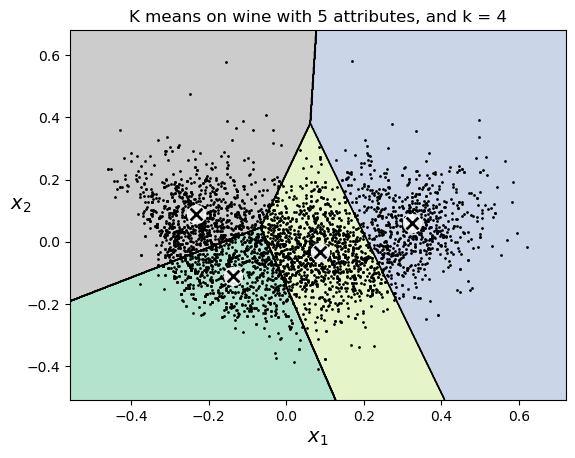

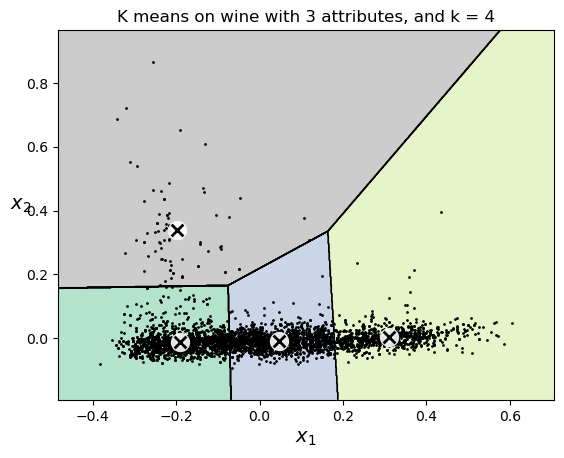

In [31]:
plt.figure(figsize=(8, 4))

# k = 4
plt.title("K means on wine with 11 attributes, and k = 4")
plot_decision_boundaries(kmeans11_k4, pca_11)
plt.show()

plt.title("K means on wine with 8 attributes, and k = 4")
plot_decision_boundaries(kmeans8_k4, pca_8)
plt.show()

plt.title("K means on wine with 5 attributes, and k = 4")
plot_decision_boundaries(kmeans5_k4, pca_5)
plt.show()

plt.title("K means on wine with 3 attributes, and k = 4")
plot_decision_boundaries(kmeans3_k4, pca_3)
plt.show()

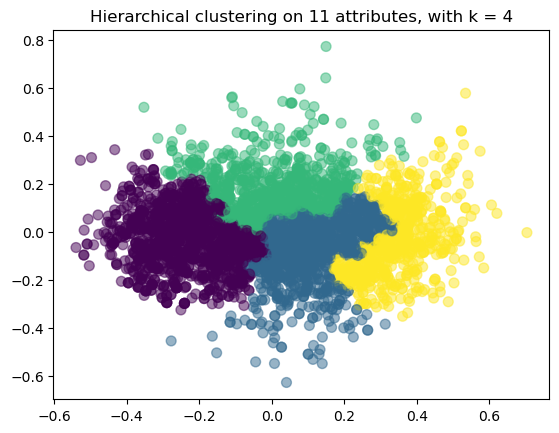

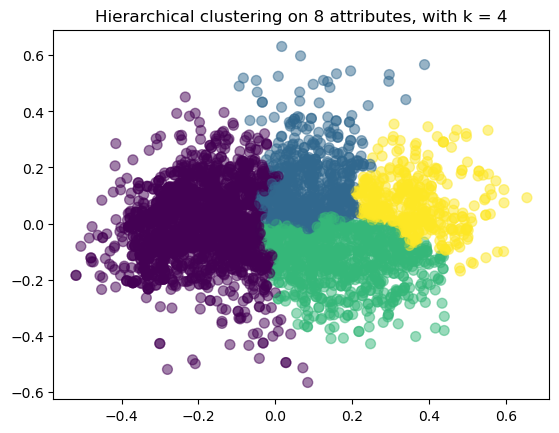

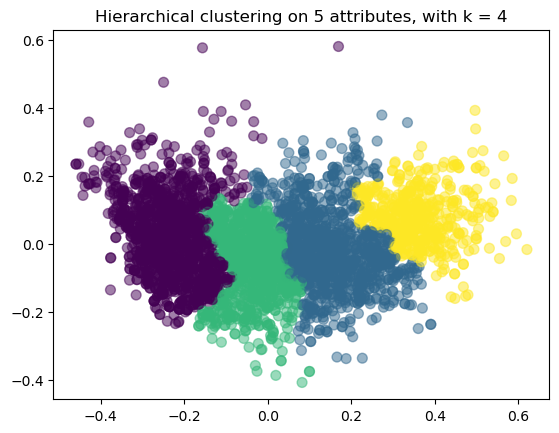

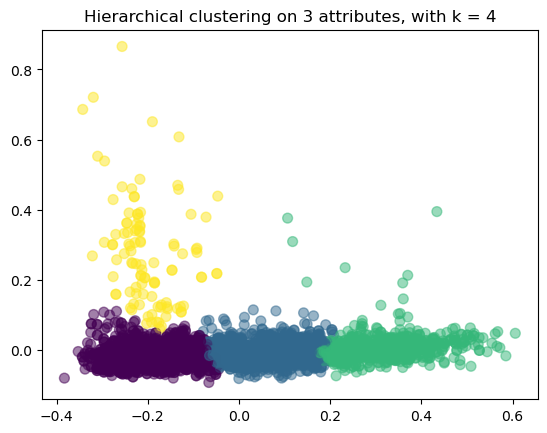

In [24]:
# k = 4
hierarch_k4 = AgglomerativeClustering(n_clusters=4)

applyHierarch11_k4 = hierarch_k4.fit_predict(pca_11)
plt.scatter(pca_11[:, 0], pca_11[:, 1], c=applyHierarch11_k4, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 11 attributes, with k = 4")
plt.show()

applyHierarch8_k4 = hierarch_k4.fit_predict(pca_8)
plt.scatter(pca_8[:, 0], pca_8[:, 1], c=applyHierarch8_k4, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 8 attributes, with k = 4")
plt.show()


applyHierarch5_k4 = hierarch_k4.fit_predict(pca_5)
plt.scatter(pca_5[:, 0], pca_5[:, 1], c=applyHierarch5_k4, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 5 attributes, with k = 4")
plt.show()


applyHierarch3_k4 = hierarch_k4.fit_predict(pca_3)
plt.scatter(pca_3[:, 0], pca_3[:, 1], c=applyHierarch3_k4, cmap='viridis', alpha=0.5, s=50)
plt.title("Hierarchical clustering on 3 attributes, with k = 4")
plt.show()

### More Silhouette and David Baldwin Scores for clustering 

In [25]:
print("k = 4")
print("Silhouette score for K means, on 11 attributes and k = 4: " + str(silhouette_score(pca_11, kmeans11_k4.labels_)))
print("Silhouette score for hierarchical clustering, on 11 attributes and k = 4: " + str(silhouette_score(pca_11, applyHierarch11_k4)))

print("Silhouette score for K means, on 8 attributes and k = 4: " + str(silhouette_score(pca_8, kmeans8_k4.labels_)))
print("Silhouette score for hierarchical clustering, on 8 attributes and k = 4: " + str(silhouette_score(pca_8, applyHierarch8_k4)))

print("Silhouette score for K means, on 5 attributes and k = 4: " + str(silhouette_score(pca_5, kmeans5_k4.labels_)))
print("Silhouette score for hierarchical clustering, on 5 attributes and k = 4: " + str(silhouette_score(pca_5, applyHierarch5_k4)))

print("Silhouette score for K means, on 3 attributes and k = 4: " + str(silhouette_score(pca_3, kmeans3_k4.labels_)))
print("Silhouette score for hierarchical clustering, on 3 attributes and k = 4: " + str(silhouette_score(pca_3, applyHierarch3_k4)))

print("")

print("Davies Bouldin score for K means, on 11 attributes and k = 4: " + str(davies_bouldin_score(pca_11, kmeans11_k4.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 11 attributes and k = 4: " + str(davies_bouldin_score(pca_11, applyHierarch11_k4)))

print("Davies Bouldin score for K means, on 8 attributes and k = 4: " + str(davies_bouldin_score(pca_8, kmeans8_k4.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 8 attributes and k = 4: " + str(davies_bouldin_score(pca_8, applyHierarch8_k4)))

print("Davies Bouldin score for K means, on 5 attributes and k = 4: " + str(davies_bouldin_score(pca_5, kmeans5_k4.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 5 attributes and k = 4: " + str(davies_bouldin_score(pca_5, applyHierarch5_k4)))

print("Davies Bouldin score for K means, on 3 attributes and k = 4: " + str(davies_bouldin_score(pca_3, kmeans3_k4.labels_)))
print("Davies Bouldin score for hierarchical clustering, on 3 attributes and k = 4: " + str(davies_bouldin_score(pca_3, applyHierarch3_k4)))


k = 4
Silhouette score for K means, on 11 attributes and k = 4: 0.36732654953324445
Silhouette score for hierarchical clustering, on 11 attributes and k = 4: 0.3137724756670608
Silhouette score for K means, on 8 attributes and k = 4: 0.37769137267481767
Silhouette score for hierarchical clustering, on 8 attributes and k = 4: 0.33750548738534136
Silhouette score for K means, on 5 attributes and k = 4: 0.36693656968621324
Silhouette score for hierarchical clustering, on 5 attributes and k = 4: 0.29706052560405416
Silhouette score for K means, on 3 attributes and k = 4: 0.5475491511286934
Silhouette score for hierarchical clustering, on 3 attributes and k = 4: 0.5393670808699027

Davies Bouldin score for K means, on 11 attributes and k = 4: 0.8592839211497345
Davies Bouldin score for hierarchical clustering, on 11 attributes and k = 4: 1.0850688214411264
Davies Bouldin score for K means, on 8 attributes and k = 4: 0.8690642424109533
Davies Bouldin score for hierarchical clustering, on 8 a

# Conclusion

### Overall, clustering proved to be less effective in identifying distinct clusters within the dataset. This may be attributed to the subjective nature of the perceived quality in the data—quality predictions were influenced more by the taster's perception than by the chemical properties of the wine.

# Predicting Wine Quality Using Classification Models
This section will explore how to predict the wine quality (quality column) using three different classifier models: Decision Tree Classifier, k-Nearest Neighbors (k-NN) Classifier, and Random Forest Classifier. We will evaluate the models based on metrics such as f1 score.

## Imports

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Create a copy of the wine dataset
wine_quality_classed = wine.copy()

# Function to class the qualities into the three categories
def categorize_quality(value):
    if value < 6:
        return 'low'
    elif value == 6:
        return 'medium'
    else:
        return 'high'


# function for feature importances
def feature_importances_df(decision_tree_model, features):
   
    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({'Feature': features,'Importance': decision_tree_model.feature_importances_})

     # Round the importance values to the specified number of decimal points
    feature_importances['Importance'] = feature_importances['Importance'].round(2)
    
    # Sort the DataFrame by importance in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Return the DataFrame
    return feature_importances

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Create a copy of the wine dataset
wine_quality_classed = wine.copy()

# Function to class the qualities into the three categories
def categorize_quality(value):
    if value < 6:
        return 'low'
    elif value == 6:
        return 'medium'
    else:
        return 'high'


# function for feature importances
def feature_importances_df(decision_tree_model, features):
   
    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({'Feature': features,'Importance': decision_tree_model.feature_importances_})

     # Round the importance values to the specified number of decimal points
    feature_importances['Importance'] = feature_importances['Importance'].round(2)
    
    # Sort the DataFrame by importance in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
    
    # Return the DataFrame
    return feature_importances

# Expermiental Setup

# Quality Class and Problem Framing

The quality class in this dataset was categorized into three levels:

- **Low**: quality < 6  
- **Medium**: quality = 6  
- **High**: quality > 6  

This choice was based on the distribution of quality in the dataset:  
- Low: 1640  
- Medium: 2198  
- High: 1060  

Classifying the qualities simplified the 10-point scale, making it more interpretable and practical for both predictive modeling and real-world applications. Framing this problem as a **classification task** (predicting quality levels: low, medium, high) aligned with the categorical nature and modeling objectives of the dataset.

---

# Classifier Models and Optimization

## Decision Tree Classifier

The Decision Tree Classifier model was optimized using **GridSearchCV** with 5-fold cross-validation to identify the best-performing hyperparameters. The following ranges of hyperparameters were tested:

- **Max_depth**: [3, 5, 10, None]  
  - *Rationale*: Limiting tree depth reduces overfitting by controlling the model’s complexity, while allowing unrestricted growth.  
  *(Source: [Medium](https://medium.com/nerd-for-tech/overfitting-and-pruning-in-decision-trees-improving-models-accuracy-fdbe9ecd1160))*

- **Min_samples_split**: [2, 5, 10]  
  - *Rationale*: Increasing the minimum samples required to split an internal node can prevent overfitting, ensuring meaningful splits.  
  *(Source: [Fiveable](https://library.fiveable.me/key-terms/machine-learning-engineering/minimum-samples-required-to-split-node))*

- **Min_samples_leaf**: [1, 2, 4]  
  - *Rationale*: Setting a minimum number of samples per leaf improves model generalization by avoiding overfitting on small branches.  
  *(Source: [PlainEnglish](https://plainenglish.io/blog/decision-tree-parameters-explanations-tuning-a2b0749976e5))*

- **Class_weight**: [None, Balanced]  
  - *Rationale*: For imbalanced datasets, this adjusts weights inversely to class frequencies, improving fairness across categories.  
  *(Source: [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))*

---

## K-Nearest Neighbor (KNN) Classifier

The KNN Classifier was optimized using cross-validation to find the best-performing value for `k` (number of neighbors). A range of `k` values (1–30) was tested using 5-fold cross-validation. Features were scaled using **StandardScaler** to ensure equal contribution to distance calculations.

### Rationale
- Increasing `k` balances the trade-off between overfitting (low `k`) and underfitting (high `k`).  
- The optimal `k` was selected based on cross-validation accuracy.  
*(Source: [ProgrammingR](https://www.programmingr.com/knn-hyperparameters-a-friendly-guide-to-optimization/))*

This systematic approach aligns with best practices for hyperparameter tuning in KNN models.

---

## Random Forest Classifier

The Random Forest Classifier was optimized using **GridSearchCV** with 5-fold cross-validation to identify the best-performing hyperparameters. The following ranges of hyperparameters were tested:

- **n_estimators**: [50, 100, 200]  
  - *Rationale*: Increasing the number of trees improves model stability and reduces variance.  
  *(Source: [Towards Data Science](https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d))*

- **Max_depth**: [10, 20, None]  
  - *Rationale*: Controlling the tree depth helps manage overfitting.

- **Min_samples_split**: [2, 5, 10]  
  - *Rationale*: Requiring more samples for splits prevents overfitting.  

- **Min_samples_leaf**: [1, 2, 4]  
  - *Rationale*: Ensuring a minimum number of samples per leaf improves generalization by avoiding splits with very few samples.  
  *(Source: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/))*

---

## Feature Subset Experiments

To evaluate the impact of dimensionality reduction, models were tested with feature subsets containing **11**, **7**, and **3 features**. Features were removed based on their correlation with the quality class, starting with the least correlated ones. 

This experiment investigated whether reducing the number of features improved **model generalization** and **performance**.


## Desision Tree Classifier Model

### Decision Tree Classifier on the whole dataset (11 Features)

In [34]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV to optimize the Decision Tree
# The parameter grid specifies the hyperparameter values to test during grid search.
param_grid = {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'class_weight': [None, 'balanced']}

# Initialise DecisionTreeClassifier
decision_tree_model_classifier = DecisionTreeClassifier(random_state=42)

# Perform the grid search optimization 
grid_search = GridSearchCV(decision_tree_model_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the training data on the grid
grid_search.fit(X_train_data, Y_train_data)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model= grid_search.best_estimator_

# Evaluate the optimized model
Y_quality_prediction = best_model.predict(X_test_data)
accuracy = round(accuracy_score(Y_test_data, Y_quality_prediction),2)
class_report = classification_report(Y_test_data, Y_quality_prediction)

# Confusion matrix for the optimized model
conf_matrix = confusion_matrix(Y_test_data, Y_quality_prediction)

# Print results for the optimized model
print("\n===== Optimized Decision Tree Classifier =====")
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Get the sorted feature importances as a DataFrame
feature_importances_df_result = feature_importances_df(best_model, X_features.columns)

# Print the DataFrame
print("\nFeature Importances as DataFrame:")
print(feature_importances_df_result)

Fitting 5 folds for each of 72 candidates, totalling 360 fits

===== Optimized Decision Tree Classifier =====
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.65
Classification Report:
              precision    recall  f1-score   support

        high       0.70      0.69      0.70       227
         low       0.66      0.64      0.65       321
      medium       0.63      0.64      0.64       432

    accuracy                           0.65       980
   macro avg       0.66      0.66      0.66       980
weighted avg       0.65      0.65      0.65       980


Confusion Matrix:
[[157   9  61]
 [ 12 207 102]
 [ 55 100 277]]

Feature Importances as DataFrame:
                 Feature  Importance
0                alcohol        0.19
1       volatile acidity        0.10
2    free sulfur dioxide        0.10
3          fixed acidity        0.09
4                density        0.09
5                     pH 

### Decision Tree Classifier 7 Features

In [35]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV to optimize the Decision Tree
# The parameter grid specifies the hyperparameter values to test during grid search.
param_grid = {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'class_weight': [None, 'balanced']}

# Initialise DecisionTreeClassifier
decision_tree_model_classifier = DecisionTreeClassifier(random_state=42)

# Perform the grid search optimization 
grid_search = GridSearchCV(decision_tree_model_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the training data on the grid
grid_search.fit(X_train_data, Y_train_data)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model= grid_search.best_estimator_

# Evaluate the optimized model
Y_quality_prediction = best_model.predict(X_test_data)
accuracy = round(accuracy_score(Y_test_data, Y_quality_prediction),2)
class_report = classification_report(Y_test_data, Y_quality_prediction)

# Confusion matrix for the optimized model
conf_matrix = confusion_matrix(Y_test_data, Y_quality_prediction)

# Print results for the optimized model
print("\n===== Optimized Decision Tree Classifier =====")
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Get the sorted feature importances as a DataFrame
feature_importances_df_result = feature_importances_df(best_model, X_features.columns)

# Print the DataFrame
print("\nFeature Importances as DataFrame:")
print(feature_importances_df_result)

Fitting 5 folds for each of 72 candidates, totalling 360 fits

===== Optimized Decision Tree Classifier =====
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.65
Classification Report:
              precision    recall  f1-score   support

        high       0.66      0.67      0.67       227
         low       0.67      0.63      0.65       321
      medium       0.62      0.65      0.64       432

    accuracy                           0.65       980
   macro avg       0.65      0.65      0.65       980
weighted avg       0.65      0.65      0.65       980


Confusion Matrix:
[[152   7  68]
 [ 19 201 101]
 [ 59  93 280]]

Feature Importances as DataFrame:
                Feature  Importance
0               alcohol        0.22
1  total sulfur dioxide        0.15
2      volatile acidity        0.14
3               density        0.14
4                    pH        0.12
5         fixed acidity        

### Decision Tree Classifier 3 Features

In [36]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar','pH','fixed acidity','total sulfur dioxide','volatile acidity'])

Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV to optimize the Decision Tree
# The parameter grid specifies the hyperparameter values to test during grid search.
param_grid = {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'class_weight': [None, 'balanced']}


# Initialise DecisionTreeClassifier
decision_tree_model_classifier = DecisionTreeClassifier(random_state=42)

# Perform the grid search optimization 
grid_search = GridSearchCV(decision_tree_model_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the training data on the grid
grid_search.fit(X_train_data, Y_train_data)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model= grid_search.best_estimator_

# Evaluate the optimized model
Y_quality_prediction = best_model.predict(X_test_data)
accuracy = round(accuracy_score(Y_test_data, Y_quality_prediction),2)
class_report = classification_report(Y_test_data, Y_quality_prediction)

# Confusion matrix for the optimized model
conf_matrix = confusion_matrix(Y_test_data, Y_quality_prediction)

# Print results for the optimized model
print("\n===== Optimized Decision Tree Classifier =====")
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Get the sorted feature importances as a DataFrame
feature_importances_df_result = feature_importances_df(best_model, X_features.columns)

# Print the DataFrame
print("\nFeature Importances as DataFrame:")
print(feature_importances_df_result)

Fitting 5 folds for each of 72 candidates, totalling 360 fits

===== Optimized Decision Tree Classifier =====
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.62
Classification Report:
              precision    recall  f1-score   support

        high       0.56      0.61      0.58       227
         low       0.65      0.66      0.65       321
      medium       0.64      0.59      0.62       432

    accuracy                           0.62       980
   macro avg       0.61      0.62      0.62       980
weighted avg       0.62      0.62      0.62       980


Confusion Matrix:
[[139  21  67]
 [ 31 213  77]
 [ 79  96 257]]

Feature Importances as DataFrame:
     Feature  Importance
0    density        0.40
1  chlorides        0.31
2    alcohol        0.29


## k-Nearest Neighbors (k-NN) Classification model

### k-Nearest Neighbors Classifier on the whole dataset (11 Features)

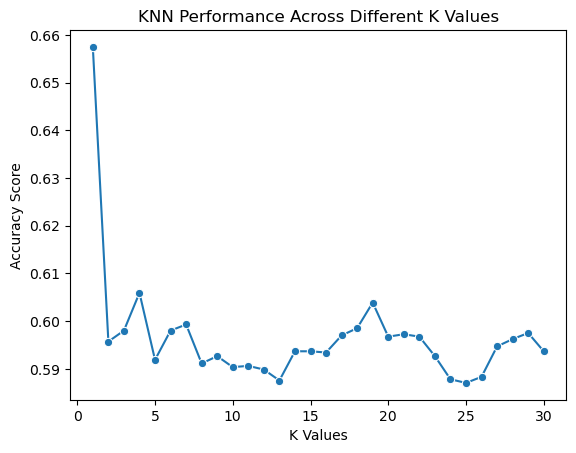

Optimal K Value: 1
KNN Classifier
Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

        high       0.69      0.72      0.71       227
         low       0.70      0.70      0.70       321
      medium       0.68      0.67      0.67       432

    accuracy                           0.69       980
   macro avg       0.69      0.69      0.69       980
weighted avg       0.69      0.69      0.69       980


Confusion Matrix:
[[163  10  54]
 [ 13 224  84]
 [ 59  85 288]]

Real vs Predicted Values (First 15 Rows):
   Real Values Predicted Values
0         high             high
1         high             high
2         high           medium
3          low              low
4         high             high
5       medium           medium
6          low              low
7          low           medium
8       medium           medium
9          low              low
10        high             high
11         low              low
12        high        

In [37]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Initialise a StandardScaler to scale features
scaler = StandardScaler()

# Fit and transform training data
X_train_data_scaled = scaler.fit_transform(X_train_data)

# Transform the testing data
X_test_data_scaled = scaler.transform(X_test_data)

# Initialise k_scores to store the cross validation scores as a list
k_scores = []

# Initialise the range of k (1 - 20)
k_range = [i for i in range (1,31)]

# # Loop over the range of k_range to evaluate performance for each k
for k_value in k_range:

    # Use the model with the value of neighbours to the number of k in this iteration
    KNN_model = KNeighborsClassifier(n_neighbors=k_value)
    
    # Use cross-validation with accuracy as the scoring metric for the k value score
    k_score = cross_val_score(KNN_model, X_train_data_scaled, Y_train_data, cv=5, scoring='accuracy')

    # Add the mean of k_score to  
    k_scores.append(np.mean(k_score))

# Plot k values vs accuracy
sns.lineplot(x=k_range, y=k_scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("KNN Performance Across Different K Values")
plt.show()


# Determine the optimal k value (highest accuracy)
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal K Value: {optimal_k}")

# Define the k-NN model with the optimal number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the training data to the model
knn_classifier.fit(X_train_data_scaled, Y_train_data)

# Make predictions on the test set
Y_Quality_Prediction = knn_classifier.predict(X_test_data_scaled)

# Evaluate the classifier
accuracy = round(accuracy_score(Y_test_data, Y_Quality_Prediction),2)
class_report = classification_report(Y_test_data, Y_Quality_Prediction)
conf_matrix = confusion_matrix(Y_test_data, Y_Quality_Prediction)

# Display results
print(f"KNN Classifier\nAccuracy: {accuracy}\n")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame for real vs predicted values
dataFrame = pd.DataFrame({'Real Values': Y_test_data.values, 'Predicted Values': Y_Quality_Prediction})

print("\nReal vs Predicted Values (First 15 Rows):")
print(dataFrame.head(15))



### k-Nearest Neighbors Classifier on the whole dataset (7 Features)

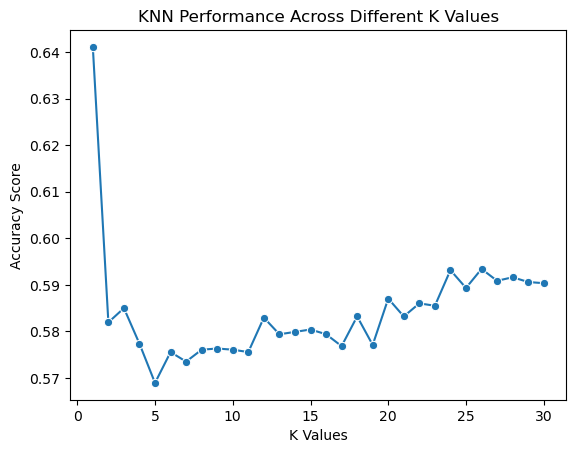

Optimal K Value: 1
KNN Classifier
Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

        high       0.64      0.68      0.66       227
         low       0.71      0.72      0.71       321
      medium       0.67      0.65      0.66       432

    accuracy                           0.68       980
   macro avg       0.67      0.68      0.68       980
weighted avg       0.68      0.68      0.68       980


Confusion Matrix:
[[154  15  58]
 [ 14 230  77]
 [ 72  81 279]]

Real vs Predicted Values (First 15 Rows):
   Real Values Predicted Values
0         high             high
1         high             high
2         high           medium
3          low              low
4         high             high
5       medium           medium
6          low              low
7          low           medium
8       medium           medium
9          low              low
10        high             high
11         low              low
12        high        

In [38]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Initialise a StandardScaler to scale features
scaler = StandardScaler()

# Fit and transform training data
X_train_data_scaled = scaler.fit_transform(X_train_data)

# Transform the testing data
X_test_data_scaled = scaler.transform(X_test_data)

# Initializ k_scores to store the cross validation scores as a list
k_scores = []

# Initialise the range of k (1 - 20)
k_range = [i for i in range (1,31)]

# # Loop over the range of k values to evaluate performance for each k
for k_value in k_range:

    # Use the model with the value of neighbours to the number of k in this iteration
    KNN_model = KNeighborsClassifier(n_neighbors=k_value)
    
    # Use cross-validation with negative accuracy as the scoring metric for the k value score
    k_score = cross_val_score(KNN_model, X_train_data_scaled, Y_train_data, cv=5, scoring='accuracy')

    # Add the mean of k_score to  
    k_scores.append(np.mean(k_score))


# Plot k values vs accuracy
sns.lineplot(x=k_range, y=k_scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("KNN Performance Across Different K Values")
plt.show()


# Determine the optimal k value (highest accuracy)
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal K Value: {optimal_k}")

# Define the k-NN model with the optimal number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the training data to the model
knn_classifier.fit(X_train_data_scaled, Y_train_data)

# Make predictions on the test set
Y_Quality_Prediction = knn_classifier.predict(X_test_data_scaled)

# Evaluate the classifier
accuracy = round(accuracy_score(Y_test_data, Y_Quality_Prediction),2)
class_report = classification_report(Y_test_data, Y_Quality_Prediction)
conf_matrix = confusion_matrix(Y_test_data, Y_Quality_Prediction)

# Display results
print(f"KNN Classifier\nAccuracy: {accuracy}\n")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame for real vs predicted values
dataFrame = pd.DataFrame({'Real Values': Y_test_data.values, 'Predicted Values': Y_Quality_Prediction})

print("\nReal vs Predicted Values (First 15 Rows):")
print(dataFrame.head(15))

### k-Nearest Neighbors Classification on  (3 Features)

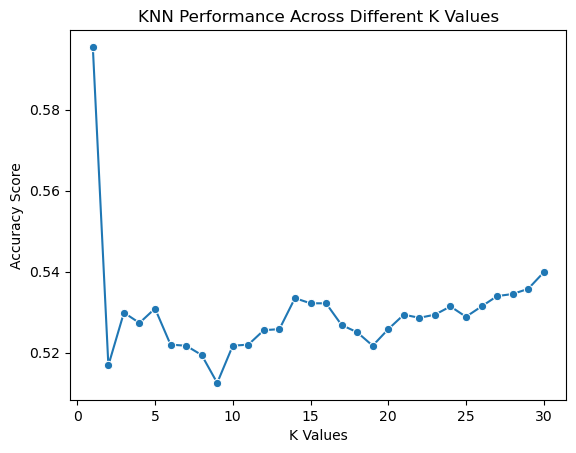

Optimal K Value: 1
KNN Classifier
Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

        high       0.63      0.61      0.62       227
         low       0.64      0.65      0.64       321
      medium       0.63      0.64      0.64       432

    accuracy                           0.64       980
   macro avg       0.64      0.63      0.63       980
weighted avg       0.64      0.64      0.64       980


Confusion Matrix:
[[138  18  71]
 [ 24 208  89]
 [ 57  98 277]]

Real vs Predicted Values (First 15 Rows):
   Real Values Predicted Values
0         high             high
1         high             high
2         high           medium
3          low              low
4         high             high
5       medium           medium
6          low              low
7          low           medium
8       medium           medium
9          low              low
10        high             high
11         low           medium
12        high        

In [39]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar','pH','fixed acidity','total sulfur dioxide','volatile acidity'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Initialise a StandardScaler to scale features
scaler = StandardScaler()

# Fit and transform training data
X_train_data_scaled = scaler.fit_transform(X_train_data)

# Transform the testing data
X_test_data_scaled = scaler.transform(X_test_data)

# Initializ k_scores to store the cross validation scores as a list
k_scores = []

# Initialise the range of k (1 - 20)
k_range = [i for i in range (1,31)]

# # Loop over the range of k values to evaluate performance for each k
for k_value in k_range:

    # Use the model with the value of neighbours to the number of k in this iteration
    KNN_model = KNeighborsClassifier(n_neighbors=k_value)
    
    # Use cross-validation with accuracy as the scoring metric for the k value score
    k_score = cross_val_score(KNN_model, X_train_data_scaled, Y_train_data, cv=5, scoring='accuracy')

    # Add the mean of k_score to  
    k_scores.append(np.mean(k_score))


# Plot k values vs accuracy
sns.lineplot(x=k_range, y=k_scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("KNN Performance Across Different K Values")
plt.show()


# Determine the optimal k value (highest accuracy)
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal K Value: {optimal_k}")

# Define the k-NN model with the optimal number of neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)

# Fit the training data to the model
knn_classifier.fit(X_train_data_scaled, Y_train_data)

# Make predictions on the test set
Y_Quality_Prediction = knn_classifier.predict(X_test_data_scaled)

# Evaluate the classifier
accuracy = round(accuracy_score(Y_test_data, Y_Quality_Prediction),2)
class_report = classification_report(Y_test_data, Y_Quality_Prediction)
conf_matrix = confusion_matrix(Y_test_data, Y_Quality_Prediction)

# Display results
print(f"KNN Classifier\nAccuracy: {accuracy}\n")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame for real vs predicted values
dataFrame = pd.DataFrame({'Real Values': Y_test_data.values, 'Predicted Values': Y_Quality_Prediction})

print("\nReal vs Predicted Values (First 15 Rows):")
print(dataFrame.head(15))

## Random Forest Classification Model

### Random Forest Classification on the whole dataset (11 features)

In [40]:
from sklearn.ensemble import RandomForestClassifier 
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Initialise a StandardScaler to scale features
scaler = StandardScaler()

# Fit and transform training data
X_train_data_scaled = scaler.fit_transform(X_train_data)

# Transform the testing data
X_test_data_scaled = scaler.transform(X_test_data)

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Initialise the desicion tree regressor model
random_forest_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model,param_grid=param_grid,cv=5,  scoring='accuracy',  n_jobs=-1,  verbose=2  )

# Fit GridSearchCV
grid_search.fit(X_train_data_scaled, Y_train_data)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters from Grid Search:")
print(best_params)

# Make the prediction using the model on the testing set
Y_Quality_Prediction = best_model.predict(X_test_data_scaled)

# Evaluate the model
accuracy = round(accuracy_score(Y_test_data, Y_Quality_Prediction),2)
class_report = classification_report(Y_test_data, Y_Quality_Prediction)
conf_matrix = confusion_matrix(Y_test_data, Y_Quality_Prediction)

# Display results
print(f"Random Forest\nAccuracy: {accuracy}\n")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame for real vs predicted values
dataFrame = pd.DataFrame({'Real Values': Y_test_data.values, 'Predicted Values': Y_Quality_Prediction})

print("\nReal vs Predicted Values (First 15 Rows):")
print(dataFrame.head(15))

# Get the sorted feature importances as a DataFrame
feature_importances_df_result = feature_importances_df(best_model, X_features.columns)

# Print the DataFrame
print("\nFeature Importances as DataFrame:")
print(feature_importances_df_result)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters from Grid Search:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

        high       0.81      0.68      0.74       227
         low       0.76      0.73      0.74       321
      medium       0.68      0.76      0.72       432

    accuracy                           0.73       980
   macro avg       0.75      0.72      0.73       980
weighted avg       0.74      0.73      0.73       980


Confusion Matrix:
[[154   5  68]
 [  3 235  83]
 [ 34  71 327]]

Real vs Predicted Values (First 15 Rows):
   Real Values Predicted Values
0         high             high
1         high             high
2         high             high
3          low              low
4         high             high
5       medium           medium
6          low              low
7          low     

### Random Forest Classification on 7 features

In [41]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Initialise a StandardScaler to scale features
scaler = StandardScaler()

# Fit and transform training data
X_train_data_scaled = scaler.fit_transform(X_train_data)

# Transform the testing data
X_test_data_scaled = scaler.transform(X_test_data)

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Initialise the desicion tree regressor model
random_forest_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV( estimator=random_forest_model,param_grid=param_grid,cv=5,  scoring='accuracy', n_jobs=-1,   verbose=2  )

# Fit GridSearchCV
grid_search.fit(X_train_data_scaled, Y_train_data)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters from Grid Search:")
print(best_params)

# Make the prediction using the model on the testing set
Y_Quality_Prediction = best_model.predict(X_test_data_scaled)

# Evaluate the model
accuracy = round(accuracy_score(Y_test_data, Y_Quality_Prediction),2)
class_report = classification_report(Y_test_data, Y_Quality_Prediction)
conf_matrix = confusion_matrix(Y_test_data, Y_Quality_Prediction)

# Display results
print(f"Random Forest\nAccuracy: {accuracy}\n")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame for real vs predicted values
dataFrame = pd.DataFrame({'Real Values': Y_test_data.values, 'Predicted Values': Y_Quality_Prediction})

print("\nReal vs Predicted Values (First 15 Rows):")
print(dataFrame.head(15))

# Get the sorted feature importances as a DataFrame
feature_importances_df_result = feature_importances_df(best_model, X_features.columns)

# Print the DataFrame
print("\nFeature Importances as DataFrame:")
print(feature_importances_df_result)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters from Grid Search:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

        high       0.80      0.67      0.73       227
         low       0.75      0.70      0.73       321
      medium       0.67      0.76      0.71       432

    accuracy                           0.72       980
   macro avg       0.74      0.71      0.72       980
weighted avg       0.73      0.72      0.72       980


Confusion Matrix:
[[152   5  70]
 [  4 226  91]
 [ 33  70 329]]

Real vs Predicted Values (First 15 Rows):
   Real Values Predicted Values
0         high             high
1         high             high
2         high             high
3          low              low
4         high             high
5       medium           medium
6          low              low
7          low     

### Random Forest Classification on 3 features

In [42]:
# Split the dataset into features (X) and target (Y)
# X_features contains all columns except 'quality', which is the target variable.
# Y_target is the target variable transformed into categorical classes ('low', 'medium', 'high').
X_features = wine_quality_classed.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar','pH','fixed acidity','total sulfur dioxide','volatile acidity'])
Y_target = wine_quality_classed['quality'].apply(categorize_quality)

# Split data into training (80%) and testing (20%) subsets.
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X_features, Y_target, test_size=0.2, random_state=42)

# Initialise a StandardScaler to scale features
scaler = StandardScaler()

# Fit and transform training data
X_train_data_scaled = scaler.fit_transform(X_train_data)

# Transform the testing data
X_test_data_scaled = scaler.transform(X_test_data)

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [10, 20, 30, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

# Initialise the desicion tree regressor model
random_forest_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1, verbose=2 )

# Fit GridSearchCV
grid_search.fit(X_train_data_scaled, Y_train_data)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters from Grid Search:")
print(best_params)

# Make the prediction using the model on the testing set
Y_Quality_Prediction = best_model.predict(X_test_data_scaled)

# Evaluate the model
accuracy = round(accuracy_score(Y_test_data, Y_Quality_Prediction),2)
class_report = classification_report(Y_test_data, Y_Quality_Prediction)
conf_matrix = confusion_matrix(Y_test_data, Y_Quality_Prediction)

# Display results
print(f"Random Forest\nAccuracy: {accuracy}\n")
print("Classification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Create a DataFrame for real vs predicted values
dataFrame = pd.DataFrame({'Real Values': Y_test_data.values, 'Predicted Values': Y_Quality_Prediction})

print("\nReal vs Predicted Values (First 15 Rows):")
print(dataFrame.head(15))

# Get the sorted feature importances as a DataFrame
feature_importances_df_result = feature_importances_df(best_model, X_features.columns)

# Print the DataFrame
print("\nFeature Importances as DataFrame:")
print(feature_importances_df_result)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters from Grid Search:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest
Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

        high       0.66      0.61      0.63       227
         low       0.66      0.68      0.67       321
      medium       0.65      0.66      0.66       432

    accuracy                           0.66       980
   macro avg       0.66      0.65      0.65       980
weighted avg       0.66      0.66      0.66       980


Confusion Matrix:
[[139  20  68]
 [ 19 219  83]
 [ 53  93 286]]

Real vs Predicted Values (First 15 Rows):
   Real Values Predicted Values
0         high             high
1         high             high
2         high             high
3          low              low
4         high             high
5       medium           medium
6          low              low
7          low    

## Conclusions

## Conclusion

The evaluation of the models with different feature subsets (11, 7, and 3 features) provides valuable insights into their performance across Decision Tree, K-Nearest Neighbor (KNN), and Random Forest classifiers.

### Key Findings:
1. **Decision Tree Classifier**:
   - Performed consistently with 11 and 7 features, achieving an accuracy of **65%**. However, performance dropped to **62%** when only 3 features were used.
   - Feature importance analysis revealed that **alcohol**, **density**, and **chlorides** were the most influential features.
   - Overfitting appeared to be mitigated with reduced features, but overall model generalization was slightly compromised with fewer features.

2. **K-Nearest Neighbor Classifier (KNN)**:
   - Showed the highest accuracy with 11 features (**69%**) but declined to **68%** and **64%** for 7 and 3 features, respectively.
   - The optimal value for `k` was consistently found to be **1**, indicating sensitivity to small feature subsets.
   - Scaling features ensured balanced contributions, yet the classifier struggled with generalization as features were reduced.

3. **Random Forest Classifier**:
   - Achieved the best performance across all classifiers, with an accuracy of **73%** using 11 features and **72%** with 7 features. Accuracy dropped to **66%** with 3 features.
   - Feature importance analysis highlighted **density**, **alcohol**, and **volatile acidity** as key contributors.
   - The classifier demonstrated strong robustness and stability with a larger feature set but experienced diminished performance with limited features.

### General Observations:
- **Feature Subset Impact**: Reducing features from 11 to 7 had minimal impact on accuracy, but further reduction to 3 features resulted in significant performance degradation across all models.
- **Model Comparison**: Random Forest consistently outperformed Decision Tree and KNN classifiers in terms of accuracy and stability, especially with larger feature sets.
- **Imbalanced Dataset**: Adjusting for class imbalance using techniques like `class_weight` improved fairness in predictions, particularly for Decision Tree and Random Forest models.

### Final Thoughts:
This analysis highlights the importance of feature selection and its impact on model performance. While reducing features can help combat overfitting, it must be balanced against the potential loss of predictive power. Among the models tested, Random Forest demonstrated the highest accuracy and robustness, making it the most suitable choice for this dataset.





# Neural Networks

In [43]:
!pip install tensorflow

### Imports

In [43]:
# Importing important modules (Copy pasted from the tutorial, determine if we need all these imports)
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required


# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Conv1D, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Used for clustering
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore", message="^UserWarning")

**Removing Outliers** 

In [44]:
wine_cleaned_2 = wine.copy()

colsRemove = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']

for col in colsRemove:
    upper = wine[col].mean() + 3 * wine[col].std()
    lower = wine[col].mean() - 3 * wine[col].std()
    wine_cleaned_2 = wine_cleaned_2[(wine_cleaned_2[col] < upper) & (wine_cleaned_2[col] > lower)]

**Checking for any null values**

In [45]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Checking is quality is balanced**

In [46]:
plt.hist(wine['quality'])

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

**Balancing Quality**

In [52]:
x = wine.drop('quality',axis= 1)
y = wine['quality']
smote = SMOTE(k_neighbors=3)
x_balanced, y_balanced = smote.fit_resample(x,y)
x_balanced_df = pd.DataFrame(x_balanced, columns=x.columns)
balanced_wine = pd.concat([x_balanced_df, y_balanced], axis=1)

**checking wine is now balanced**

In [53]:
plt.hist(balanced_wine['quality'])

(array([2198., 2198.,    0., 2198.,    0., 2198., 2198.,    0., 2198.,
        2198.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

**Creting Subsets**

In [54]:
wine8 = balanced_wine.copy()
wine8 = wine8.drop("free sulfur dioxide", axis=1)
wine8 = wine8.drop("citric acid", axis=1)
wine8 = wine8.drop("sulphates", axis =1)

wine5 = wine8.copy()
wine5 = wine5.drop("residual sugar", axis=1)
wine5 = wine5.drop("pH", axis=1)
wine5 = wine5.drop("fixed acidity", axis=1)

wine3 = wine5.copy()
wine3 = wine3.drop("total sulfur dioxide", axis=1)
wine3 = wine3.drop("volatile acidity", axis=1)

**Normalising the Data***

In [55]:
from sklearn.preprocessing import MinMaxScaler

def normalise_dataset(scaler, dataset):
    return scaler.transform(dataset)

def split_dataset(dataset):
    # Splits the dataset into a training and a test set (80/20 split)
    dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=42)
    return dataset_train, dataset_test

# Split dataset into training and testing
cluster_train, cluster_test = split_dataset(wine8)

# Separate features and labels
cluster_train_labels = cluster_train["quality"]
cluster_test_labels = cluster_test["quality"]
cluster_train = cluster_train.drop("quality", axis=1)
cluster_test = cluster_test.drop("quality", axis=1)

# Fit the scaler on training data and apply to both training and testing data
scaler = MinMaxScaler()
scaler.fit(cluster_train)  # Fit on training data only

cluster_train = normalise_dataset(scaler, cluster_train)
cluster_test = normalise_dataset(scaler, cluster_test)


**Setting Up the Layers**

In [56]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(32, activation='relu')) 
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [58]:
model.fit(cluster_train, cluster_train_labels, epochs=50)

Epoch 1/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2626 - loss: 1.8718
Epoch 2/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4320 - loss: 1.4135
Epoch 3/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4933 - loss: 1.2435
Epoch 4/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5086 - loss: 1.1900
Epoch 5/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5237 - loss: 1.1461
Epoch 6/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5364 - loss: 1.1196
Epoch 7/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5497 - loss: 1.0793
Epoch 8/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5571 - loss: 1.0637
Epoch 9/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5702 - loss: 1.0435
Epoch 10/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5824 - loss: 1.0101
Epoch 11/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5836 - loss: 0.9894
Epoch 12/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

**Evaluate Accuracy**

In [59]:
test_loss, test_acc = model.evaluate(cluster_test,  cluster_test_labels, verbose=2)

97/97 - 0s - 4ms/step - accuracy: 0.6875 - loss: 0.7502


**Probability Model**
For making predictions

In [60]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [61]:
# 11 Attributes
num_classes = 10

# Define the CNN model
cnn_model = Sequential([
    Input(shape=(11,1)),
    # Add Convolutional Layers
    Conv1D(filters=32, kernel_size=1, activation='relu', strides=2),
    Conv1D(filters=64, kernel_size=1, activation='relu', strides=2),
    # Reduce Dimensionality to 1
    GlobalAveragePooling1D(),
    # Add Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output Layer
    Dense(10, activation='softmax')
])

# Compile the Model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Fit the model to the training data
history = cnn_model.fit(cluster_train, cluster_train_labels, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
predictions = cnn_model.predict(cluster_test)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6, 32)          │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,786 (46.04 KB)

 Trainable params: 11,786 (46.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1390 - loss: 2.1161 - val_accuracy: 0.1515 - val_loss: 1.9456
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1618 - loss: 1.9572 - val_accuracy: 0.2169 - val_loss: 1.8757
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2153 - loss: 1.8755 - val_accuracy: 0.2681 - val_loss: 1.7971
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2410 - loss: 1.8112 - val_accuracy: 0.2697 - val_loss: 1.7755
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2612 - loss: 1.7777 - val_accuracy: 0.2880 - val_loss: 1.7602
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2807 - loss: 1.7687 - val_accuracy: 0.2827 - val_loss: 1.7562
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2773 - loss: 1.7686 - val_accuracy: 0.2900 - val_loss: 1.7484
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2878 - loss: 1.7581 - val_accuracy: 0.

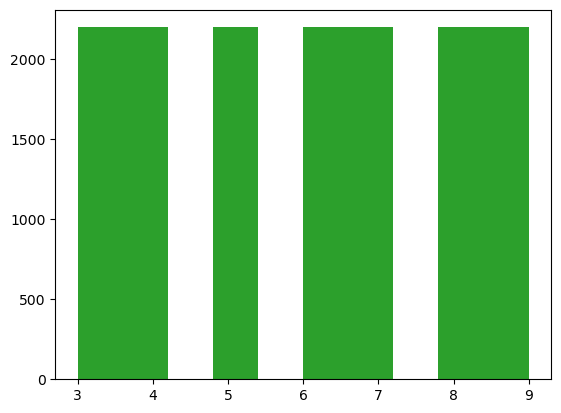

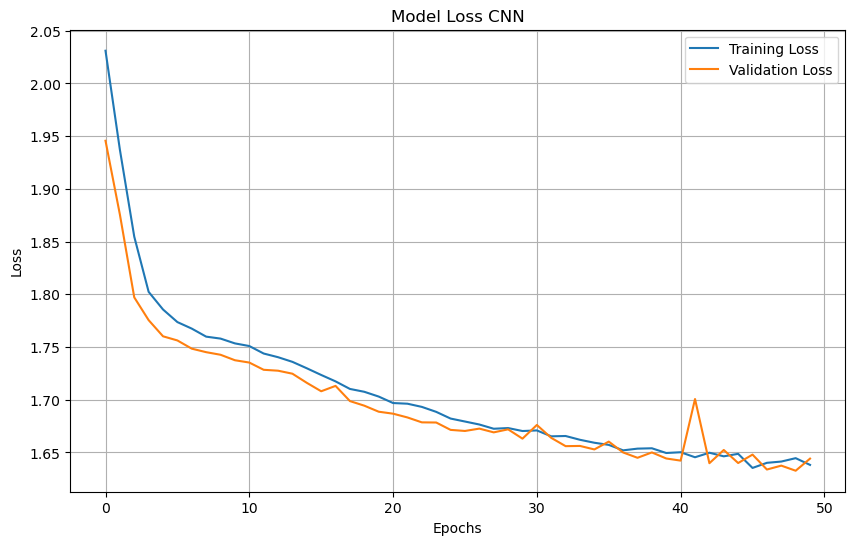

Test Loss: 1.6334
Test Accuracy: 34.34%


In [62]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot model loss over epoch
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss CNN')
plt.legend()
plt.grid()
plt.show()

test_loss, test_accuracy = cnn_model.evaluate(cluster_test, cluster_test_labels, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [63]:
# 7 Attributes
X_features = wine.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar'])

num_classes = 10

# Define the CNN model
cnn_model = Sequential([
    Input(shape=(7,1)),
    # Add Convolutional Layers
    Conv1D(filters=32, kernel_size=1, activation='relu', strides=2),
    Conv1D(filters=64, kernel_size=1, activation='relu', strides=2),
    # Reduce Dimensionality to 1
    GlobalAveragePooling1D(),
    # Add Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output Layer
    Dense(10, activation='softmax')
])

# Compile the Model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Fit the model to the training data
history = cnn_model.fit(cluster_train, cluster_train_labels, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
predictions = cnn_model.predict(cluster_test)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 4, 32)          │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 2, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,786 (46.04 KB)

 Trainable params: 11,786 (46.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1368 - loss: 2.1145 - val_accuracy: 0.1401 - val_loss: 1.9525
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1489 - loss: 1.9632 - val_accuracy: 0.2104 - val_loss: 1.9085
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2083 - loss: 1.8943 - val_accuracy: 0.2400 - val_loss: 1.8392
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2108 - loss: 1.8580 - val_accuracy: 0.2437 - val_loss: 1.8181
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2334 - loss: 1.8265 - val_accuracy: 0.2429 - val_loss: 1.7909
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2523 - loss: 1.7980 - val_accuracy: 0.2819 - val_loss: 1.7707
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2728 - loss: 1.7891 - val_accuracy: 0.2876 - val_loss: 1.7590
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2831 - loss: 1.7647 - val_accuracy: 0.

In [64]:
# 3 Attributes
X_features = wine.drop(columns=['quality','free sulfur dioxide','citric acid','sulphates','residual sugar','pH','fixed acidity','total sulfur dioxide','volatile acidity'])

num_classes = 10

# Define the CNN model
cnn_model = Sequential([
    Input(shape=(3,1)),
    # Add Convolutional Layers
    Conv1D(filters=32, kernel_size=1, activation='relu', strides=2),
    Conv1D(filters=64, kernel_size=1, activation='relu', strides=2),
    # Reduce Dimensionality to 1
    GlobalAveragePooling1D(),
    # Add Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),
    # Output Layer
    Dense(10, activation='softmax')
])

# Compile the Model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Fit the model to the training data
history = cnn_model.fit(cluster_train, cluster_train_labels, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
predictions = cnn_model.predict(cluster_test)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 2, 32)          │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,786 (46.04 KB)

 Trainable params: 11,786 (46.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1536 - loss: 2.0948 - val_accuracy: 0.1775 - val_loss: 1.9428
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1762 - loss: 1.9420 - val_accuracy: 0.2522 - val_loss: 1.8550
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2223 - loss: 1.8574 - val_accuracy: 0.2559 - val_loss: 1.7953
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2478 - loss: 1.8136 - val_accuracy: 0.2591 - val_loss: 1.7761
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2645 - loss: 1.7876 - val_accuracy: 0.2620 - val_loss: 1.7682
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2697 - loss: 1.7748 - val_accuracy: 0.2758 - val_loss: 1.7645
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2835 - loss: 1.7669 - val_accuracy: 0.2843 - val_loss: 1.7568
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2839 - loss: 1.7663 - val_accuracy: 0.

## Overview

This analysis involves training various neural network models for multi-class classification tasks over 50 epochs. The models use convolutional layers (`Conv1D`), global average pooling, and dense layers with dropout for regularization. The key metrics observed during training include accuracy and loss, measured for both training and validation datasets.

### Key Observations

1. **Model Architecture**:
   - Sequential models with convolutional layers followed by pooling, dense layers, and dropout.
   - Total parameters per model: approximately 11,786.

2. **Training Performance**:
   - Accuracy increased consistently, reaching a peak of approximately **69.96%**.
   - Training loss steadily decreased, indicating effective learning during training.

3. **Validation Performance**:
   - Validation accuracy plateaued at **34%–35%** for later models, suggesting a gap in generalization.
   - Validation loss showed limited improvement after initial epochs, reflecting challenges in capturing unseen data patterns.

### Conclusion

While the models effectively learned during training, their ability to generalize to unseen data was limited, as indicated by the disparity between training and validation accuracy. This may be due to:
- Dataset challenges such as imbalanced class distribution or limited complexity.
- Potential overfitting requiring advanced regularization techniques or more hyperparameter tuning.

### Recommendations for Improvement
- Implement data augmentation to enhance the diversity of the dataset.
- Use techniques like early stopping or more aggressive dropout to mitigate overfitting.
- Experiment with transfer learning or deeper architectures to improve validation performance.
